# Introduction

This notebook demonstrates how a descriptive statistic as published for instance by Hamed et al. (2007) in their paper titled "Nucleation and growth of new particles in Po Valley, Italy" ([https://doi.org/10.5194/acp-7-355-2007](https://doi.org/10.5194/acp-7-355-2007), Table 3) can be computed using primary observational data and included in a paper so that there is an explicit and machine readable link between this research result and contextual information such as bibliographic metadata. The notebook also demonstrates the provenance of the result result.

In [1]:
from utils import data, plot, event, events, duration, parse, query

## Data Analysis

First, we analyse primary observational data for various days and generate derivative information, here about [atmospheric new particle formation events](http://purl.obolibrary.org/obo/ENVO_01001359). The primary observational data are collected by the Finnish [Station for Measuring Ecosystem-Atmosphere Relations](https://www.atm.helsinki.fi/SMEAR/) research infrastructure and published using [SmartSMEAR](https://avaa.tdata.fi/web/smart).

In [6]:
# 2007-04-15, 2007-05-05, 2007-05-18, 2007-10-19, 2008-02-19, 2009-03-19, 2009-03-22
# 2011-03-15, 2011-04-19, 2011-10-01, 2012-05-01, 2012-05-29, 2013-02-20, 2013-04-04

day = '2013-04-04'

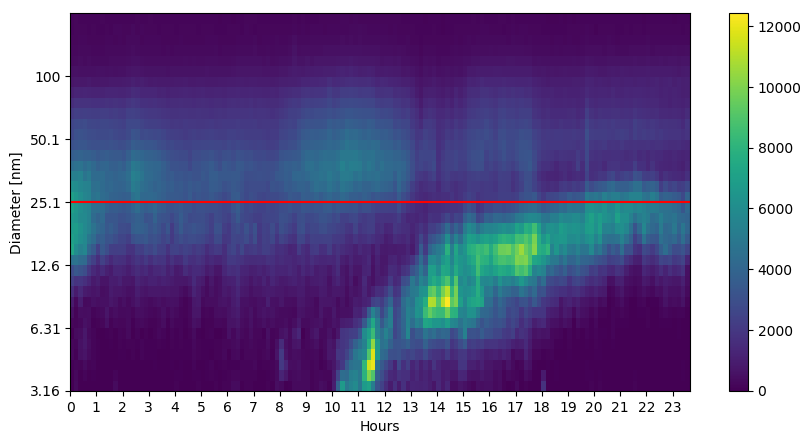

In [7]:
plot(data(day))

Given the visual product of primary observational data, researchers determine whether an new particle formation event occurred on this day and record data about the event, in particular beginning and end times as well as a class following a specific classification scheme (here we use the one by [Dal Maso et al.](http://www.borenv.net/BER/pdfs/ber10/ber10-323.pdf) with classes `Class Ia`, `Class Ib`, and `Class II`).

In [8]:
event(day, beginning='10:00', end='12:00', classification='Class Ia')

Before we compute the mean event duration, we repeat this step for another day.

Then, let's read event information into a data frame for easy processing, including the computation of mean duration.

In [9]:
df = events()
df.style.hide_columns(['uri', 'place'])

,beginning,end,classification
0,2013-02-20 12:00:00+02:00,2013-02-20 15:00:00+02:00,Class Ia
1,2013-04-04 10:00:00+03:00,2013-04-04 12:00:00+03:00,Class Ia


Let's compute the mean duration.

In [10]:
v = (df.end - df.beginning).astype('timedelta64[h]').mean()
print(v)

2.5


But rather than leaving it at a value, we create an identified information object that captures the meaning of the value as a mean duration of new particle formation events as well as the provenance of the value, in machine readable form. The identifier of this information object is returned.

In [11]:
u = duration(v, df)
print(u)

http://avaa.tdata.fi/web/smart/smear/75c6c9893ba44b3066096902137c8585


## Scholarly Communication

Scientific information resulting in data analysis may be published in the literature. It would be great to make this link explicit so that we can enrich the information with, e.g., bibliographic metadata. 

Let's assume authors are [working on their article](https://mstocker.solid.community/public/hamed07nucleation.html). For the purpose here, we use [dokieli](https://dokie.li) since it supports [RDFa](http://rdfa.info/) annotations. You can edit the article with the mean duration you computed above, annotate as follows:

* about: https://doi.org/10.5194/acp-7-355-2007
* property: orkg:yields
* href: the http://avaa.tdata.fi/web/smart/smear/ URI above

save it on your [Solid server](https://solid.community/), and in the next step parse it from there by providing the URL.

In [12]:
parse('https://mstocker.solid.community/public/hamed07nucleation.html')

Let's get some bibliographic information about the article first.

In [13]:
display(query("""
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX bibo: <http://purl.org/ontology/bibo/>
PREFIX dc: <http://purl.org/dc/terms/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX vivo: <http://vivoweb.org/ontology/core#>
PREFIX orkg: <http://orkg.org/core#>
SELECT ?title ?doi ?firstname ?lastname ?orcidId WHERE {
  ?a a bibo:Article, orkg:ResearchContribution .  
  ?a dc:title ?title .                            
  ?a bibo:doi ?doi .                              
  ?a dc:creator ?c .
  ?c foaf:givenname ?firstname .
  ?c foaf:family_name ?lastname .
  OPTIONAL { ?c vivo:orcidId ?orcidId } .
}
"""))

,title,doi,firstname,lastname,orcidId
0,Nucleation and growth of new particles in Po V...,https://doi.org/10.5194/acp-7-355-2007,Amar,Hamed,NaN
1,Nucleation and growth of new particles in Po V...,https://doi.org/10.5194/acp-7-355-2007,Markku,Kulmala,https://orcid.org/0000-0003-3464-7825
2,Nucleation and growth of new particles in Po V...,https://doi.org/10.5194/acp-7-355-2007,Ari,Laaksonen,https://orcid.org/0000-0002-1657-2383


Thanks to the annotation in the article, we can now exploit the link between article bibliographic information and the computed mean duration, published in the literature as a result result.

In [14]:
display(query("""
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX bibo: <http://purl.org/ontology/bibo/>
PREFIX dc: <http://purl.org/dc/terms/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX vivo: <http://vivoweb.org/ontology/core#>
PREFIX orkg: <http://orkg.org/core#>
SELECT ?result ?about ?value ?unit WHERE {
  ?a a bibo:Article, orkg:ResearchContribution .                             
  ?a bibo:doi <https://doi.org/10.5194/acp-7-355-2007> .
  ?a orkg:yields ?r .                             
  ?r a orkg:ResearchResult .
  ?r a [ rdfs:label ?result ] .
  ?r obo:IAO_0000004 ?value .
  ?r obo:IAO_0000039 [ rdfs:label ?unit ] .
  ?r obo:IAO_0000136 [ rdfs:label ?about ] .
}
"""))

,result,about,value,unit
0,scalar measurement datum,atmospheric aerosol formation event,2.5,hour
1,average value,atmospheric aerosol formation event,2.5,hour


And because the infrastructure tracks [provenance](https://www.w3.org/TR/2013/REC-prov-o-20130430/), we can ask for the [datasets](http://purl.obolibrary.org/obo/IAO_0000100) for which mean durations were computed. The [data items](http://purl.obolibrary.org/obo/IAO_0000027) as [parts of](http://purl.obolibrary.org/obo/BFO_0000051) datasets are new particle formation event descriptions. We can extract for instance beginning and end times.

In [15]:
display(query("""
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX obo: <http://purl.obolibrary.org/obo/>
SELECT ?entity1 ?beginning ?end WHERE {
  ?entity2 prov:wasDerivedFrom ?entity1 .
  ?entity1 a obo:IAO_0000100 .
  ?entity1 obo:BFO_0000051 ?part .
  ?part a obo:IAO_0000027 .
  ?part rdf:type lode:Event .
  ?part lode:atTime ?atTime .
  ?atTime time:hasBeginning ?hasBeginning .
  ?hasBeginning time:inXSDDateTime ?beginning .
  ?atTime time:hasEnd ?hasEnd .
  ?hasEnd time:inXSDDateTime ?end .
}
ORDER BY (?entity1)
"""))

,entity1,beginning,end
0,http://avaa.tdata.fi/web/smart/smear/acd2a10e3...,2013-02-20T12:00:00+02:00,2013-02-20T15:00:00+02:00
1,http://avaa.tdata.fi/web/smart/smear/acd2a10e3...,2013-04-04T10:00:00+03:00,2013-04-04T12:00:00+03:00
